In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

In [4]:
import seaborn as sns

color=sns.color_palette()

In [5]:
import sklearn.metrics as metrics 

In [6]:
credit = pd.read_csv("credit_risk_dataset.csv")

In [7]:
credit.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [8]:
credit.shape

(32581, 12)

In [9]:
credit.describe()

,age,income,emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


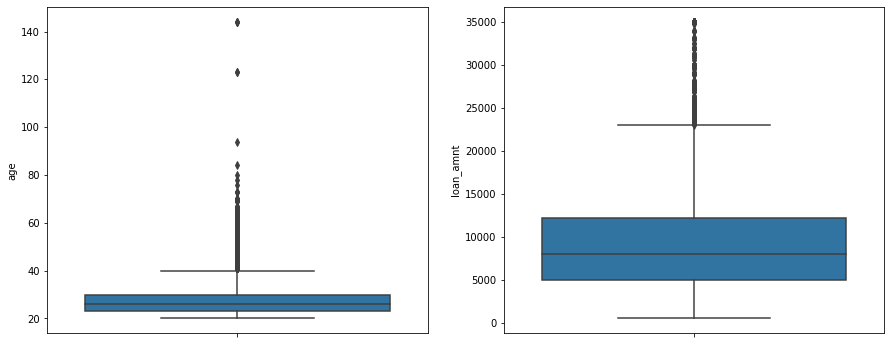

In [10]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=credit["age"])

plt.subplot(1,2,2)
sns.boxplot(y=credit["loan_amnt"])

plt.show()

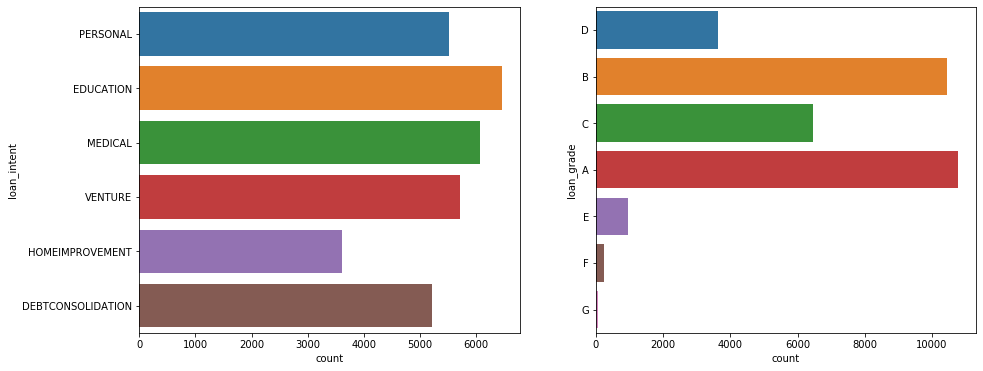

In [11]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(y=credit["loan_intent"])

plt.subplot(1,2,2)
sns.countplot(y=credit["loan_grade"])

plt.show()

In [12]:
credit["loan_intent"].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [13]:
credit["loan_grade"].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [14]:
credit["loan_intent"].value_counts(normalize=True)

EDUCATION            0.198060
MEDICAL              0.186336
VENTURE              0.175532
PERSONAL             0.169455
DEBTCONSOLIDATION    0.159971
HOMEIMPROVEMENT      0.110647
Name: loan_intent, dtype: float64

In [15]:
credit["loan_grade"].value_counts(normalize=True)

A    0.330776
B    0.320770
C    0.198214
D    0.111292
E    0.029588
F    0.007397
G    0.001964
Name: loan_grade, dtype: float64

In [16]:
x = credit["loan_grade"]

In [17]:
x

0        D
1        B
2        C
3        C
4        C
        ..
32576    C
32577    A
32578    B
32579    B
32580    B
Name: loan_grade, Length: 32581, dtype: object

In [18]:
y = credit["loan_amnt"]

In [19]:
z = credit["loan_int_rate"]

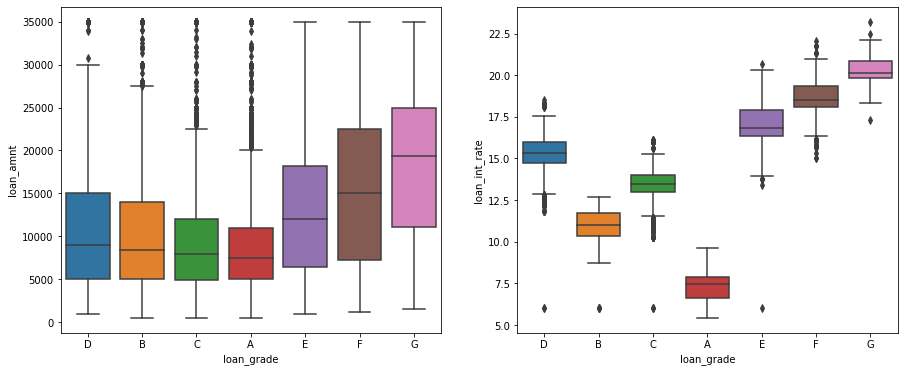

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x,y)

plt.subplot(1,2,2)
sns.boxplot(x,z)

plt.show()

In [21]:
pd.crosstab(credit["loan_grade"],credit["cb_person_default_on_file"],normalize="index").round(2)

cb_person_default_on_file,N,Y
loan_grade,,
A,1.00,0.00
B,1.00,0.00
C,0.50,0.50
D,0.48,0.52
E,0.52,0.48
F,0.54,0.46
G,0.44,0.56


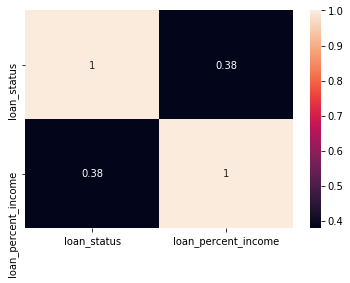

In [22]:
sns.heatmap(credit[["loan_status","loan_percent_income"]].corr(),annot=True)

In [23]:
credit.isnull().sum()

age                              0
income                           0
home_ownership                   0
emp_length                     895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [24]:
credit.mean()

age                              27.734600
income                        66074.848470
emp_length                        4.789686
loan_amnt                      9589.371106
loan_int_rate                    11.011695
loan_status                       0.218164
loan_percent_income               0.170203
cb_person_cred_hist_length        5.804211
dtype: float64

In [25]:
credit_risk = credit.fillna(credit.mean())

In [26]:
credit_risk.isnull().sum()

age                           0
income                        0
home_ownership                0
emp_length                    0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [27]:
credit_risk.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


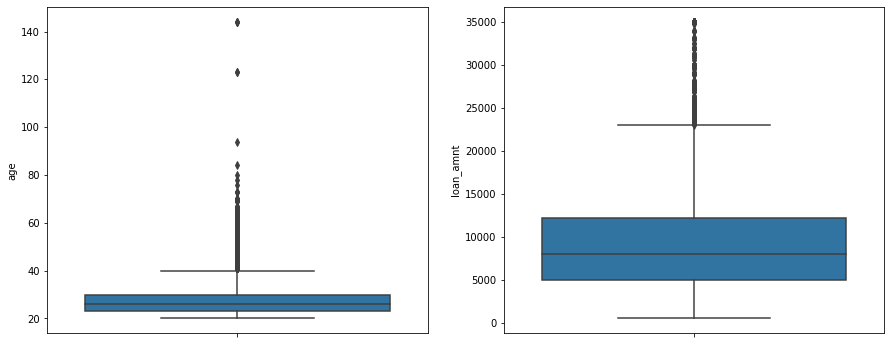

In [28]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=credit_risk["age"])

plt.subplot(1,2,2)
sns.boxplot(y=credit_risk["loan_amnt"])

plt.show()

In [29]:
Q1,Q3 = credit_risk["loan_amnt"].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [30]:
LL

-5800.0

In [31]:
UL

23000.0

In [32]:
df = credit_risk[credit_risk["loan_amnt"] > UL]

In [33]:
df

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32524,51,120000,MORTGAGE,2.0,PERSONAL,A,30000,7.90,0,0.25,N,22
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20
32541,52,163000,MORTGAGE,9.0,PERSONAL,D,25000,14.11,1,0.15,N,30
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.38,0,0.15,N,21


In [34]:
df["loan_amnt"].count()

1689

In [35]:
df["loan_intent"].value_counts(normalize=True)

EDUCATION            0.186501
PERSONAL             0.177028
MEDICAL              0.174660
DEBTCONSOLIDATION    0.161634
VENTURE              0.159858
HOMEIMPROVEMENT      0.140320
Name: loan_intent, dtype: float64

In [36]:
df["loan_intent"].value_counts()

EDUCATION            315
PERSONAL             299
MEDICAL              295
DEBTCONSOLIDATION    273
VENTURE              270
HOMEIMPROVEMENT      237
Name: loan_intent, dtype: int64

In [37]:
Q1,Q3 = credit_risk["age"].quantile([.25,.75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [38]:
LL

12.5

In [39]:
UL

40.5

In [40]:
df2 = credit_risk[credit_risk["age"] > UL]

In [41]:
df2

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,11.011695,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


In [42]:
df2["age"].count()

1494

In [43]:
df2["loan_intent"].value_counts(normalize=True)

PERSONAL             0.228246
MEDICAL              0.204819
VENTURE              0.159973
EDUCATION            0.141232
DEBTCONSOLIDATION    0.141232
HOMEIMPROVEMENT      0.124498
Name: loan_intent, dtype: float64

In [44]:
df2["loan_intent"].value_counts()

PERSONAL             341
MEDICAL              306
VENTURE              239
EDUCATION            211
DEBTCONSOLIDATION    211
HOMEIMPROVEMENT      186
Name: loan_intent, dtype: int64

In [45]:
credit["loan_amnt"] = np.where(credit["loan_amnt"]>UL,UL,credit["loan_amnt"])

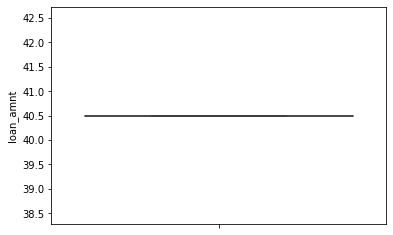

In [46]:
sns.boxplot(y= credit["loan_amnt"])
plt.show()

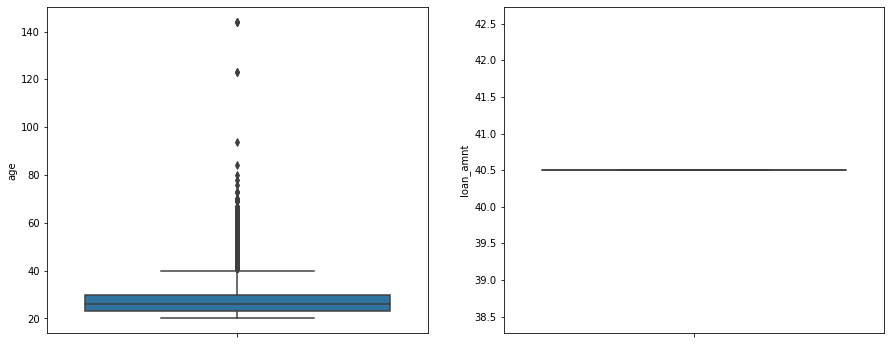

In [47]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(y=credit["age"])

plt.subplot(1,2,2)
sns.boxplot(y=credit["loan_amnt"])

plt.show()

In [48]:
credit_risk.isnull().sum()

age                           0
income                        0
home_ownership                0
emp_length                    0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
credit_risk.head()

,age,income,home_ownership,emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [51]:
x = credit_risk[["loan_amnt","loan_int_rate","loan_status","loan_percent_income"]]

In [52]:
y = credit_risk[["cb_person_default_on_file"]]

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [54]:
print(x_train.shape)
print(y_train.shape)

(22806, 4)
(22806, 1)


In [55]:
print(x_train.shape)
print(x_test.shape)

(22806, 4)
(9775, 4)


In [56]:
print(y_train.shape)
print(y_test.shape)

(22806, 1)
(9775, 1)


In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
lr.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
y_pred = lr.predict(x_test)

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_pred,y_test)

array([[8005, 1770],
       [   0,    0]], dtype=int64)

In [63]:
(8005+0)/(8005+0+1770+0)

0.818925831202046